# Basic Autogluon Example

In [ ]:
%%capture

!pip install rdkit-pypi

In [ ]:
import pandas as pd
from rdkit import Chem
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
smilescsv = pd.read_csv('dilismiles.csv', names = ['col_smiles'])

In [ ]:
## upload the smiles csv file
from google.colab import files

# Upload 'dilismiles.csv' file
uploaded = files.upload()

data = pd.read_csv('dili_padel_2d.csv')
dataframe = pd.DataFrame(data)
desc = pd.DataFrame(dataframe.iloc[:, 3:])

Saving dili_padel_2d.csv to dili_padel_2d.csv


<ipython-input-8-7fe31494d25b>:7: DtypeWarning: Columns (423,424,425,426,427,428,429,430,431,477,478,479,480,481,482,483,484,485,540,541,542,543,544,545,546,547,548,603,604,605,606,607,608,609,610,611,1012,1013,1050,1052,1074,1083,1084,1121,1123,1145,1217,1218,1219,1220,1222,1223,1224,1226,1227,1229) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dili_padel_2d.csv')


# Install Autogluon

In [ ]:
!pip install -U pip
# Upgrade setuptools to be compatible with namespace packages
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
# Install autogluon (Tutorial based on autogluon==0.1.0)
!pip install autogluon
# Upgrade ipykernel (Necessary for Colab)
!pip install -U ipykernel
# !pip install autogluon==0.0.15 autogluon.tabular "mxnet<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.6 MB/s eta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.1/114.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.28.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.28.2 which is i

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
X = TabularDataset('dili_padel_2d.csv')
print(X.head(), X.shape)

Loaded data from: dili_padel_2d.csv | Columns = 1447 / 1447 | Rows = 588 -> 588


               ID         CommonName  Outcome  nAcid  naAromAtom  nAromBond  \
0  AUTOGEN_dili_1    Aurothioglucose        1      0           0          0   
1  AUTOGEN_dili_2  DemecariumBromide        1      0          12         12   
2  AUTOGEN_dili_3   Dextromethorphan        0      0           6          6   
3  AUTOGEN_dili_4         Ergotamine        0      0          15         16   
4  AUTOGEN_dili_5     Beclomethasone        0      0           0          0   

   nB  nN  nO  nS  ...       AMW      WTPT1     WTPT2      WTPT3      WTPT4  \
0   0   0   5   1  ...  8.479683  23.078977  1.923248  15.422349  12.919448   
1   0   4   4   0  ...  6.047814  78.841924  1.971048  24.051089  11.127775   
2   0   1   1   0  ...  6.026525  42.041518  2.102076   6.134966   2.806398   
3   0   5   5   0  ...  7.452100  90.264234  2.099168  30.004012  13.475249   
4   0   0   5   0  ...  7.160883  56.562478  2.020089  15.115392  12.515759   

       WTPT5  WPATH  WPOL  XLogP  Zagreb  
0   0.0

In [ ]:
y = X['Outcome']
print(type(y),y.shape)

<class 'pandas.core.series.Series'> (588,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
label = 'Outcome'

In [ ]:
fit_args = {}
fit_args['time_limit'] = 1200
predictor = TabularPredictor(label=label).fit(x_train,presets="best_quality", **fit_args)
performance = predictor.evaluate(x_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20240109_020227"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 1200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240109_020227/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240109_020227/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

In [ ]:
print(performance)

{'accuracy': 0.711864406779661, 'balanced_accuracy': 0.5437675070028011, 'mcc': 0.14234723293242843, 'roc_auc': 0.6946778711484594, 'f1': 0.8229166666666666, 'precision': 0.7314814814814815, 'recall': 0.9404761904761905}


# With ersilia embeddings

In [ ]:
!git clone https://github.com/ersilia-os/compound-embedding-lite.git
%cd compound-embedding-lite
!pip install .

fatal: destination path 'compound-embedding-lite' already exists and is not an empty directory.
/content/compound-embedding-lite
Processing /content/compound-embedding-lite
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for eosce: filename=eosce-0.1.0-py3-none-any.whl size=45065404 sha256=17fbba87fbbe60c0b393a00be53b968ba2df3db9f927797eec1ef823b8280163
  Stored in directory: /root/.cache/pip/wheels/52/a4/e9/63fab28d020f95b10136d46d5cf8c3ad69d132b6337fda2b91
Successfully built eosce
  Attempting uninstall: eosce
    Found existing installation: eosce 0.1.0
    Uninstalling eosce-0.1.0:
      Successfully uninstalled eosce-0.1.0


In [ ]:
import pandas as pd
from eosce.models import ErsiliaCompoundEmbeddings

## upload the smiles csv file
from google.colab import files

# Upload 'dilismiles.csv' file
uploaded = files.upload()


smilescsv = pd.read_csv('dilismiles.csv', names = ['col_smiles'])

# Load your CSV file
df = pd.read_csv('dilismiles.csv')

# Assuming 'SMILES' is the column containing chemical compounds
compounds = df['col_smiles'].tolist()

# Initialize the ErsiliaCompoundEmbeddings model
model = ErsiliaCompoundEmbeddings()

# Create a new column for embeddings
df['embeddings'] = df['col_smiles'].apply(lambda x: model.transform([x])[0])

# Display the DataFrame with the new embeddings
print(df.head())

Saving dilismiles.csv to dilismiles (1).csv
                                          col_smiles  \
0  [H][C@]1([S-])O[C@]([H])(CO)[C@@]([H])(O)[C@](...   
1  CN(CCCCCCCCCCN(C)C(=O)Oc1cccc(c1)[N+](C)(C)C)C...   
2   [H][C@]12Cc3ccc(OC)cc3[C@@]3(CCCC[C@]13[H])CCN2C   
3  [H][C@@]12CCCN1C(=O)[C@]([H])(Cc1ccccc1)N1C(=O...   
4  [H][C@]1(C)C[C@@]2([H])[C@]3([H])CCC4=CC(=O)C=...   

                                          embeddings  
0  [-0.098519824, 0.12393576, 0.13180989, 0.05279...  
1  [0.015572911, 0.025008846, 0.015938658, 0.0437...  
2  [0.0857603, 0.07983373, -0.014359435, -0.21451...  
3  [0.13486916, 0.07353798, -0.14174657, -0.23422...  
4  [0.100365646, 0.038999967, -0.020612031, -0.03...  


In [ ]:
# Load your CSV file for AutoGluon
X = TabularDataset(df)
print(X.head(), X.shape)


                                          col_smiles  \
0  [H][C@]1([S-])O[C@]([H])(CO)[C@@]([H])(O)[C@](...   
1  CN(CCCCCCCCCCN(C)C(=O)Oc1cccc(c1)[N+](C)(C)C)C...   
2   [H][C@]12Cc3ccc(OC)cc3[C@@]3(CCCC[C@]13[H])CCN2C   
3  [H][C@@]12CCCN1C(=O)[C@]([H])(Cc1ccccc1)N1C(=O...   
4  [H][C@]1(C)C[C@@]2([H])[C@]3([H])CCC4=CC(=O)C=...   

                                          embeddings  
0  [-0.098519824, 0.12393576, 0.13180989, 0.05279...  
1  [0.015572911, 0.025008846, 0.015938658, 0.0437...  
2  [0.0857603, 0.07983373, -0.014359435, -0.21451...  
3  [0.13486916, 0.07353798, -0.14174657, -0.23422...  
4  [0.100365646, 0.038999967, -0.020612031, -0.03...   (588, 2)


In [ ]:
import numpy as np
# Extract embeddings into a NumPy array
X = np.vstack(df['embeddings'].values)
X.shape

(588, 1024)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(df.columns)


Index(['col_smiles', 'embeddings'], dtype='object')


In [ ]:
label = 'embeddings'

In [ ]:
fit_args = {}
fit_args['time_limit'] = 1200
predictor = TabularPredictor(label=label).fit(x_train,presets="best_quality", **fit_args)
performance = predictor.evaluate(x_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20240109_054151"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 1200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240109_054151/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240109_054151/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

In [ ]:
print(performance)

{'accuracy': 0.7203389830508474, 'balanced_accuracy': 0.6072368421052632, 'mcc': 0.2853813948716412, 'roc_auc': 0.6825657894736843, 'f1': 0.8176795580110497, 'precision': 0.7326732673267327, 'recall': 0.925}


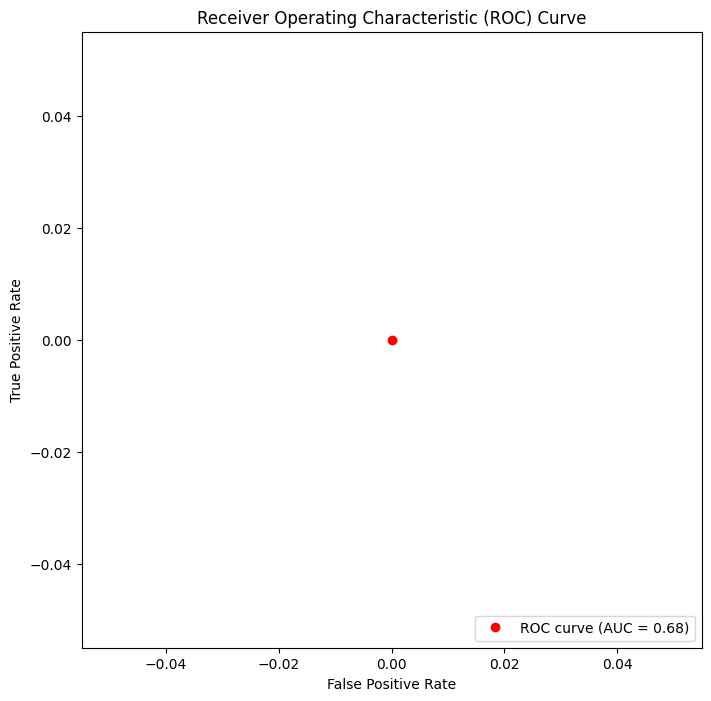

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Extract ROC AUC from performance dictionary
roc_auc = performance['roc_auc']

# Plot a single point on the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(0.0, 0.0, 'ro', label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# With  Morgan Fingerprints

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
# Load smiles.csv using pandas
smilescsv = pd.read_csv('dilismiles.csv')
# Add a column to your dataframe for Morgan fingerprints
smilescsv['morgan_fp'] = smilescsv['col_smiles'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=1024))

# Convert Morgan fingerprints to a numpy array
morgan_fps = np.array(list(smilescsv['morgan_fp']))

In [ ]:
# Split the data
x_train_morgan, x_test_morgan, y_train_morgan, y_test_morgan = train_test_split(morgan_fps, y, test_size=0.20)

In [ ]:
label = 'Outcome'

In [ ]:
fit_args = {}
fit_args['time_limit'] = 1200
predictor = TabularPredictor(label=label).fit(x_train,presets="best_quality", **fit_args)
performance = predictor.evaluate(x_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20240109_062414"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 1200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240109_062414/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.


In [ ]:

print(performance)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Extract ROC AUC from performance dictionary
roc_auc = performance['roc_auc']

# Plot a single point on the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(0.0, 0.0, 'ro', label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()